In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data from Training_Features.csv
training_features = pd.read_csv('../training_set_features.csv')

In [3]:
# Drop rows with missing values in relevant columns
columns_of_interest = [
    'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
    'behavioral_wash_hands', 'behavioral_large_gatherings',
    'behavioral_outside_home', 'behavioral_touch_face', 'age_group'
]
cleaned_data = training_features[columns_of_interest].dropna()

In [4]:
# Melt the data for better visualization
melted_data = cleaned_data.melt(
    id_vars=['age_group'],
    value_vars=[
        'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
        'behavioral_wash_hands', 'behavioral_large_gatherings',
        'behavioral_outside_home', 'behavioral_touch_face'
    ],
    var_name='Behavior',
    value_name='Action'
)

In [5]:
# Group and normalize to find proportions for each action (0 = No, 1 = Yes)
proportions = (
    melted_data.groupby(['age_group', 'Behavior', 'Action'])
    .size()
    .reset_index(name='Count')
    .pivot_table(index=['age_group', 'Behavior'], columns='Action', values='Count', fill_value=0)
)
proportions.columns = ['No', 'Yes']
proportions = proportions.reset_index()
proportions['Total'] = proportions['No'] + proportions['Yes']
proportions['Yes_Proportion'] = proportions['Yes'] / proportions['Total']

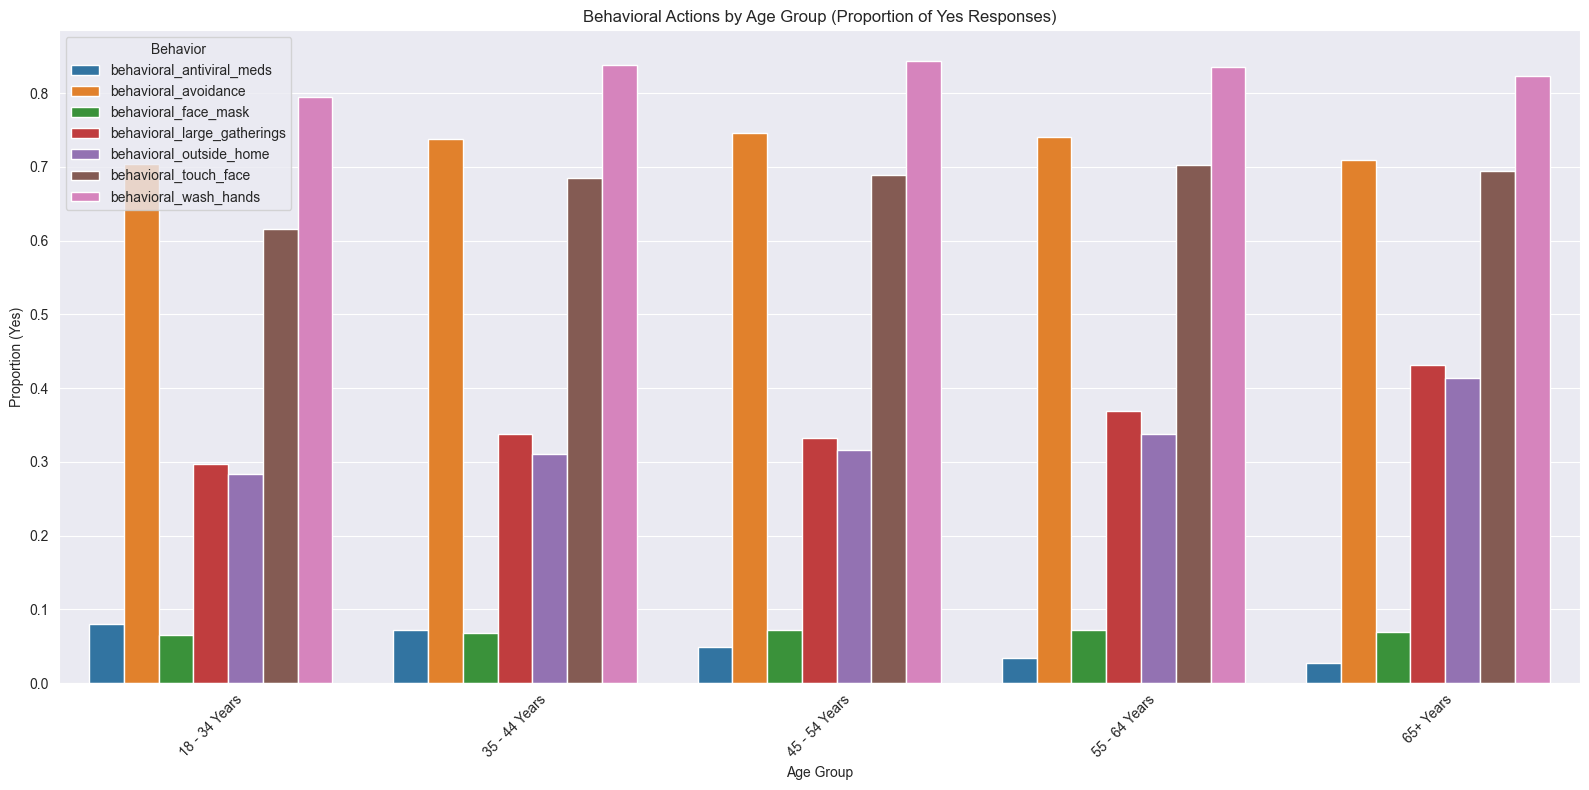

In [6]:
# Save the graph to a file
output_path = './behavioral_actions_by_age_group.png'

plt.figure(figsize=(16, 8))
sns.barplot(
    data=proportions,
    x='age_group',
    y='Yes_Proportion',
    hue='Behavior'
)
plt.title("Behavioral Actions by Age Group (Proportion of Yes Responses)")
plt.xlabel("Age Group")
plt.ylabel("Proportion (Yes)")
plt.legend(title="Behavior")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(output_path)